
# Señales y Sistemas - Laboratorio 2
## Actividad 2: Aliasing
---
### Parte 1: Audio
En la celda a continuación se provee código para generar una representación digital (muestreada) de una señal de audio que contiene un tono puro o sinusoidal con una frecuencia dada.   Ejecute la celda y podrá elegir la frecuencia del tono deseado (en Hz) y la frecuencia de muestreo (en Hz).

In [ ]:
# @title
import numpy as np
import ipywidgets as widgets
from IPython.display import Audio, display

def generate_and_play_tone(frequency, duration, samp_freq):
    # Generate a time array
    t = np.linspace(0, duration, int(samp_freq * duration), False)

    # Generate the sine wave for the specified frequency
    tone = np.sin(2 * np.pi * frequency * t)

    # Display and play the audio
    #display(Audio(tone, rate=44100))
    display(Audio(tone, rate=samp_freq, autoplay=True))

# Create interactive widgets for frequency and duration
frequency_slider = widgets.FloatSlider(value=440.0, min=20.0, max=20000.0, step=10.0, description='Frec. del tono (Hz)')
#duration_slider = widgets.FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Duración (s)')
sampling_slider = widgets.FloatSlider(value=44100, min=2000, max=44100, step=50.0, description='Frec. de muestreo (Hz)')

# Create a button to generate and play the tone
play_button = widgets.Button(description="Play Tone")

def play_button_click(b):
    frequency = frequency_slider.value
    #duration = duration_slider.value
    samp_freq = sampling_slider.value
    generate_and_play_tone(frequency, 1, samp_freq)

play_button.on_click(play_button_click)

# Display the interactive widgets
widgets.VBox([frequency_slider, sampling_slider, play_button])

### Parte 2: Imágenes
La celda a continuación carga una imagen a partir de un archivo y permite manipular la cantidad de pixeles de la imagen mediante submuestreo, como si la imagen hubiera sido adquirida mediante una cámara de menor resolución.  Ejecute la celda y luego utilícela para cargar una imagen y visualizar la misma con distintas resoluciones.

In [ ]:
# @title
import ipywidgets as widgets
from PIL import Image
import io
import numpy as np
from IPython.display import Audio, display

# Function to display the image at a specified scale
def display_image(image, scale):
    scaled_image = image.resize((int(image.width / scale), int(image.height / scale)))
    return scaled_image

# Create a file uploader widget
file_uploader = widgets.FileUpload(
    accept='image/*',
    multiple=False,
    description='Subir imagen'
)

# Create a slider for sub-sampling
subsampling_slider = widgets.IntSlider(
    value=1,
    min=1,
    max=8,
    step=1,
    description='Sub-muestreo'
)

# Create an output area for displaying the image
output_area_1 = widgets.Output(layout={'border': '1px solid black', 'width': '50%'})
output_area_2 = widgets.Output(layout={'border': '1px solid black', 'width': '50%'})

# Function to handle file upload and update the displayed image
def handle_file_upload(change):
    uploaded_image = file_uploader.value
    if uploaded_image:
        image_data = uploaded_image[list(uploaded_image.keys())[0]]['content']
        img = Image.open(io.BytesIO(image_data))

        with output_area_1:
            output_area_1.clear_output(wait=True)
            d=display_image(img, 0.5)
            display(d)

file_uploader.observe(handle_file_upload, names='value')

# Function to handle slider value change and update the displayed image
def handle_slider_change(change):
    uploaded_image = file_uploader.value
    if uploaded_image:
        image_data = uploaded_image[list(uploaded_image.keys())[0]]['content']
        img = Image.open(io.BytesIO(image_data))

        with output_area_2:
            output_area_2.clear_output(wait=True)
            N = subsampling_slider.value
            # Calculate the new dimensions
            new_width = img.width // N
            new_height = img.height // N

            # Resize the image to the new dimensions using a resampling filter (e.g., NEAREST)
            subsampled_img = img.resize((new_width, new_height), Image.NEAREST)  #This line preserves one every N pixels, with N being the subsampling ratio
            output_area_2.clear_output(wait=True)
            display(display_image(subsampled_img,0.5/N))

subsampling_slider.observe(handle_slider_change, names='value')

# Display the widgets for file uploads, the slider, and the output areas side by side
widgets.HBox([widgets.VBox([file_uploader, output_area_1]), widgets.VBox([subsampling_slider, output_area_2])])

### Parte 3: Video
El código de la celda a continuación permite generar un video de una rueda blanca y negra girando a una velocidad arbitraria.  No es necesario utilizarlo en el laboratorio, pero puede hacerse para explorar más a fondo el efecto rueda de carro.

NameError: name 'display_video' is not defined

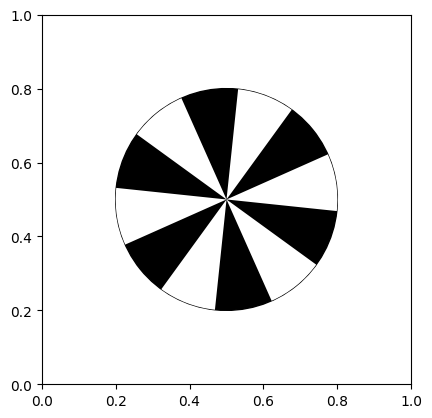

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.transforms import Affine2D
from matplotlib.patches import Arc, Wedge
from matplotlib.animation import FFMpegWriter

# Set up the figure and axis
fig, ax = plt.subplots()

def get_video(rotation_speed, fps):
  # Define the circle with black and white colors
  center = (.5, .5)
  radius = 0.3
  circle = plt.Circle(center, radius, color='black', fill=True)
  ax.add_patch(circle)

  # Define the parameters of the arc
  N=6
  arc=[]
  for i in range(N):
    angle_start = 2*i*30  # Start angle in degrees
    angle_end = (2*i+1)*30    # End angle in degrees
    # Create the arc
    arc.append(Wedge(center, radius, angle_start, angle_end, fc='white'))
    ax.add_patch(arc[i])


  # Set the aspect ratio to be equal to prevent distortion
  ax.set_aspect('equal')

  # Function to update the animation frame
  def update(frame):
      angle = frame  # Rotation angle in degrees
      transform = Affine2D().translate(-center[0],-center[1]).rotate_deg(angle).translate(center[0],center[1])
      circle.set_transform(transform + ax.transData)
      for i in range(N):
        arc[i].set_transform(transform + ax.transData)
      return circle, arc[0], arc[1], arc[2], arc[3], arc[4], arc[5]

  # Create the animation
  duration_in_time = 5 #5sec video
  dt = 1/fps
  ani = FuncAnimation(fig, update, frames=np.arange(0, duration_in_time*rotation_speed, rotation_speed*dt), blit=True)
  return ani

# Set up the video writer (requires FFmpeg to be installed)



# Save the animation as a video file
rotation_speed_in_turns_per_sec = 0.5
rotation_speed_in_deg_per_sec = 360*rotation_speed_in_turns_per_sec
fps= 30
ani = get_video(rotation_speed_in_deg_per_sec,fps) #Rotation speed is expressed in deg/s
writer = FFMpegWriter(fps=fps, metadata=dict(artist='Your Name'), bitrate=1800) # Set up the video writer (requires FFmpeg to be installed)
ani.save('Parte3/spinning_circle_'+str(rotation_speed_in_turns_per_sec)+'rps.mp4', writer=writer)


# Display the animation (optional)
from IPython.display import Video, display
video_filename = 'Parte3/spinning_circle_'+str(rotation_speed_in_turns_per_sec)+'rps.mp4'
display(Video(video_filename, width=640))
